In [1]:
import os
from pathlib import Path

In [2]:
path = Path('data')
os.listdir(path)

['extra',
 'label_num_to_disease_map.json',
 'sample_submission.csv',
 'test_images',
 'train.csv',
 'train_images']

In [3]:
path_extra = Path(path/'extra')
os.listdir(path_extra)

['extraimages', 'random.txt', 'test', 'train']

In [4]:
os.listdir(path_extra/'train')

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']

In [13]:
import json

with open(path/'label_num_to_disease_map.json') as json_file:
    data = json.load(json_file)
    
data

{'0': 'Cassava Bacterial Blight (CBB)',
 '1': 'Cassava Brown Streak Disease (CBSD)',
 '2': 'Cassava Green Mottle (CGM)',
 '3': 'Cassava Mosaic Disease (CMD)',
 '4': 'Healthy'}

In [14]:
map2labs = {
    'cbb': 0,
    'cbsd': 1,
    'cgm': 2,
    'cmd': 3, 
    'healthy': 4
}

In [16]:
train = pd.read_csv(path/'train.csv')
train

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
...,...,...
21392,999068805.jpg,3
21393,999329392.jpg,3
21394,999474432.jpg,1
21395,999616605.jpg,4


In [17]:
extra_labels = os.listdir(path_extra/'train')
extra_labels

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']

In [68]:
new_imgs, new_labs = [], []
for lab in extra_labels:
    imgs = os.listdir(path_extra/'train'/lab)
    new_imgs += [f'extra/train/{lab}/{img}' for img in imgs]
    new_labs += [int(map2labs[lab])]*len(imgs)
    print(lab, map2labs[lab], len(imgs))

cbb 0 466
cbsd 1 1443
cgm 2 773
cmd 3 2658
healthy 4 316


In [69]:
len(new_imgs), len(new_labs)

(5656, 5656)

In [70]:
new_imgs

['extra/train/cbb/train-cbb-0.jpg',
 'extra/train/cbb/train-cbb-1.jpg',
 'extra/train/cbb/train-cbb-10.jpg',
 'extra/train/cbb/train-cbb-100.jpg',
 'extra/train/cbb/train-cbb-101.jpg',
 'extra/train/cbb/train-cbb-102.jpg',
 'extra/train/cbb/train-cbb-103.jpg',
 'extra/train/cbb/train-cbb-104.jpg',
 'extra/train/cbb/train-cbb-105.jpg',
 'extra/train/cbb/train-cbb-106.jpg',
 'extra/train/cbb/train-cbb-107.jpg',
 'extra/train/cbb/train-cbb-108.jpg',
 'extra/train/cbb/train-cbb-109.jpg',
 'extra/train/cbb/train-cbb-11.jpg',
 'extra/train/cbb/train-cbb-110.jpg',
 'extra/train/cbb/train-cbb-111.jpg',
 'extra/train/cbb/train-cbb-112.jpg',
 'extra/train/cbb/train-cbb-113.jpg',
 'extra/train/cbb/train-cbb-114.jpg',
 'extra/train/cbb/train-cbb-115.jpg',
 'extra/train/cbb/train-cbb-116.jpg',
 'extra/train/cbb/train-cbb-117.jpg',
 'extra/train/cbb/train-cbb-118.jpg',
 'extra/train/cbb/train-cbb-119.jpg',
 'extra/train/cbb/train-cbb-12.jpg',
 'extra/train/cbb/train-cbb-120.jpg',
 'extra/train/cbb/t

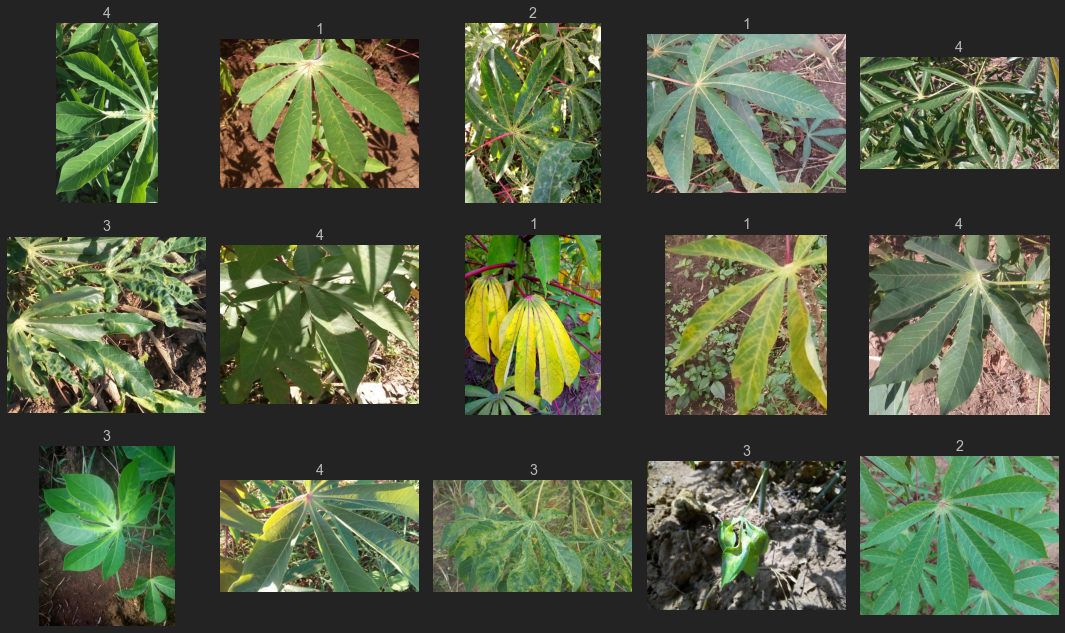

In [97]:
import random 
import torchvision

r, c = 3, 5
fig = plt.figure(figsize=(3*c, 3*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(new_imgs)-1)
        img = torchvision.io.read_image(str(path/new_imgs[ix]))
        #img = torchvision.transforms.CenterCrop(256)(img)
        label = new_labs[ix]
        plt.axis("off")
        plt.imshow(img.permute(1,2,0))
        plt.title(label)
plt.tight_layout()
plt.show()

In [82]:
from tqdm import tqdm 

shapes = []
for img in tqdm(new_imgs):
    img = torchvision.io.read_image(str(path/img))
    if img.shape not in shapes:
        shapes.append(img.shape)
shapes

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5656/5656 [00:41<00:00, 135.39it/s]


[torch.Size([3, 666, 500]),
 torch.Size([3, 500, 499]),
 torch.Size([3, 500, 500]),
 torch.Size([3, 500, 666]),
 torch.Size([3, 500, 625]),
 torch.Size([3, 500, 506]),
 torch.Size([3, 500, 888]),
 torch.Size([3, 500, 424]),
 torch.Size([3, 888, 500]),
 torch.Size([3, 500, 510]),
 torch.Size([3, 500, 505]),
 torch.Size([3, 500, 959]),
 torch.Size([3, 500, 526]),
 torch.Size([3, 500, 517]),
 torch.Size([3, 500, 545]),
 torch.Size([3, 500, 476]),
 torch.Size([3, 500, 613]),
 torch.Size([3, 500, 602]),
 torch.Size([3, 500, 512]),
 torch.Size([3, 500, 723]),
 torch.Size([3, 500, 596]),
 torch.Size([3, 575, 500]),
 torch.Size([3, 665, 500]),
 torch.Size([3, 500, 620]),
 torch.Size([3, 500, 509]),
 torch.Size([3, 533, 500]),
 torch.Size([3, 500, 574]),
 torch.Size([3, 500, 704]),
 torch.Size([3, 664, 500]),
 torch.Size([3, 500, 681]),
 torch.Size([3, 500, 624]),
 torch.Size([3, 610, 500]),
 torch.Size([3, 500, 680]),
 torch.Size([3, 1071, 500]),
 torch.Size([3, 521, 500]),
 torch.Size([3, 593

In [71]:
old_imgs = [f'train_images/{img}' for img in train['image_id'].values]
old_labs = train['label'].tolist()

len(old_imgs), len(old_labs)

(21397, 21397)

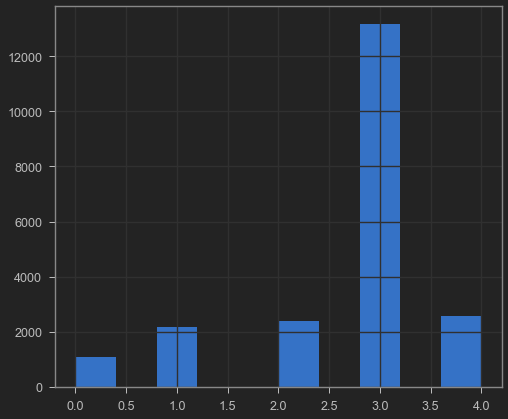

In [72]:
train.label.hist()
plt.show()

In [73]:
train_extra = pd.DataFrame({
    'image_id': old_imgs + new_imgs,
    'label': old_labs + new_labs
})

train_extra

,image_id,label
0,train_images/1000015157.jpg,0
1,train_images/1000201771.jpg,3
2,train_images/100042118.jpg,1
3,train_images/1000723321.jpg,1
4,train_images/1000812911.jpg,3
...,...,...
27048,extra/train/healthy/train-healthy-95.jpg,4
27049,extra/train/healthy/train-healthy-96.jpg,4
27050,extra/train/healthy/train-healthy-97.jpg,4
27051,extra/train/healthy/train-healthy-98.jpg,4


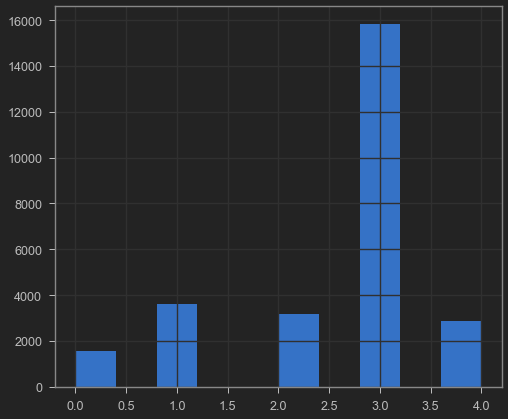

In [74]:
train_extra.label.hist()
plt.show()

In [75]:
train_extra.to_csv(path/'train_extra.csv', index=False)